# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
weather_api_key

'af8c3f1a37a16881529ff431f21509cb'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    'appid': weather_api_key,
    'units': 'imperial'
}
print("Beginning Data Retrieval")
print("------------------------------------")

city_dicty = {
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
} 
count = 1

for city in cities:
    params['q'] = city
    
    response = requests.get(base_url, params=params).json()
    
    try:
        
        city_dicty['Lat'].append(response['coord']['lat'])
        city_dicty['Lng'].append(response['coord']['lon'])
        city_dicty['Max Temp'].append(response['main']['temp_max'])
        city_dicty['Humidity'].append(response['main']['humidity'])
        city_dicty['Cloudiness'].append(response['clouds']['all'])
        city_dicty['Wind Speed'].append(response['wind']['speed'])
        city_dicty['Country'].append(response['sys']['country'])
        city_dicty['Date'].append(response['dt'])
        city_dicty['City'].append(response['name'])
        print(f'Processing Record {count} of {len(cities)} | {city}')
    except KeyError:
        print('City not found, skipping...')
    count += 1
    
        
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------------------
Processing Record 1 of 593 | new norfolk
Processing Record 2 of 593 | kununurra
Processing Record 3 of 593 | hobart
Processing Record 4 of 593 | bengkulu
Processing Record 5 of 593 | dauphin
Processing Record 6 of 593 | ushuaia
Processing Record 7 of 593 | castro
Processing Record 8 of 593 | pevek
Processing Record 9 of 593 | rikitea
Processing Record 10 of 593 | vaini
Processing Record 11 of 593 | puerto ayora
Processing Record 12 of 593 | golfito
Processing Record 13 of 593 | acari
Processing Record 14 of 593 | severo-kurilsk
Processing Record 15 of 593 | albany
Processing Record 16 of 593 | atuona
Processing Record 17 of 593 | husavik
Processing Record 18 of 593 | punta arenas
City not found, skipping...
Processing Record 20 of 593 | kapaa
Processing Record 21 of 593 | bredasdorp
Processing Record 22 of 593 | mataura
Processing Record 23 of 593 | hasaki
Processing Record 24 of 593 | chokurdakh
Processing Record 25 of 593 

Processing Record 210 of 593 | honiara
Processing Record 211 of 593 | mangaluru
Processing Record 212 of 593 | kaeo
Processing Record 213 of 593 | alofi
Processing Record 214 of 593 | aykhal
Processing Record 215 of 593 | viedma
Processing Record 216 of 593 | palotina
Processing Record 217 of 593 | nanortalik
Processing Record 218 of 593 | grindavik
Processing Record 219 of 593 | weilerswist
Processing Record 220 of 593 | hutang
Processing Record 221 of 593 | batagay
Processing Record 222 of 593 | scottsbluff
Processing Record 223 of 593 | salalah
Processing Record 224 of 593 | narsaq
Processing Record 225 of 593 | teguise
Processing Record 226 of 593 | puerto madryn
Processing Record 227 of 593 | newport
City not found, skipping...
Processing Record 229 of 593 | upernavik
Processing Record 230 of 593 | mount gambier
Processing Record 231 of 593 | warrnambool
Processing Record 232 of 593 | kumluca
City not found, skipping...
Processing Record 234 of 593 | sorong
Processing Record 235 o

City not found, skipping...
Processing Record 421 of 593 | bonthe
Processing Record 422 of 593 | svetlyy
Processing Record 423 of 593 | seymour
Processing Record 424 of 593 | parati
Processing Record 425 of 593 | fort nelson
Processing Record 426 of 593 | vardo
Processing Record 427 of 593 | ust-kut
Processing Record 428 of 593 | torbay
Processing Record 429 of 593 | arica
Processing Record 430 of 593 | nanyang
Processing Record 431 of 593 | guadalajara
Processing Record 432 of 593 | vila velha
Processing Record 433 of 593 | idritsa
Processing Record 434 of 593 | hobyo
Processing Record 435 of 593 | kimbe
Processing Record 436 of 593 | sioux lookout
Processing Record 437 of 593 | kindia
Processing Record 438 of 593 | bara
Processing Record 439 of 593 | kandrian
Processing Record 440 of 593 | freetown
Processing Record 441 of 593 | sao filipe
Processing Record 442 of 593 | sribne
Processing Record 443 of 593 | olavarria
Processing Record 444 of 593 | chimala
Processing Record 445 of 593

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
city_df = pd.DataFrame(city_dicty)

city_df.to_csv(output_data_file, index = False)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,48.00,88,85,1.01,AU,1603826686
1,Kununurra,-15.77,128.73,78.80,94,97,2.93,AU,1603826686
2,Hobart,-42.88,147.33,48.99,93,75,1.12,AU,1603826687
3,Bengkulu,-3.80,102.27,75.65,84,94,4.81,ID,1603826446
4,Dauphin,51.15,-100.05,35.60,80,90,10.29,CA,1603826688
...,...,...,...,...,...,...,...,...,...
541,Japura,-0.32,102.35,74.16,95,99,2.26,ID,1603827011
542,Lakhdenpokh'ya,61.52,30.20,50.00,91,100,12.10,RU,1603827012
543,Aklavik,68.22,-135.01,10.40,85,40,2.24,CA,1603827012
544,Santa Cruz,30.42,-9.60,66.20,77,0,9.17,MA,1603827013


In [28]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.027527,17.140330,58.303370,72.631868,53.157509,7.648993,1.603827e+09
std,33.781671,90.324303,22.602467,21.415805,40.885754,5.293287,1.258181e+02
min,-54.800000,-179.170000,-10.260000,8.000000,0.000000,0.310000,1.603826e+09
25%,-8.910000,-59.397500,42.800000,63.250000,1.000000,3.462500,1.603827e+09
50%,25.105000,20.920000,62.980000,78.000000,69.000000,6.790000,1.603827e+09
75%,48.635000,101.122500,77.000000,88.750000,94.000000,10.290000,1.603827e+09
max,78.220000,179.320000,97.050000,100.000000,100.000000,35.860000,1.603827e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
humidaf = city_df.loc[city_df['Humidity'] > 100,:]
humidaf
# isn't that called rain?

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

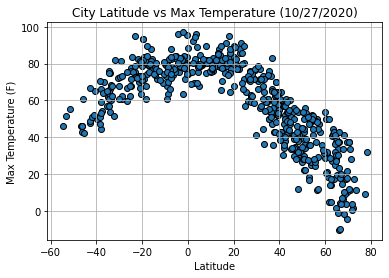

In [31]:
lat = city_df['Lat']
maxtemp = city_df['Max Temp']

plt.scatter(lat, maxtemp, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (10/27/2020)')
plt.grid()

## Latitude vs. Humidity Plot

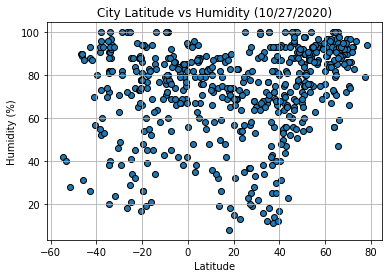

In [32]:
humid = city_df['Humidity']

plt.scatter(lat, humid, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (10/27/2020)')
plt.grid()

## Latitude vs. Cloudiness Plot

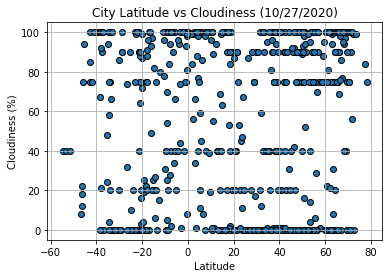

In [33]:
cloud = city_df['Cloudiness']

plt.scatter(lat, cloud, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (10/27/2020)')
plt.grid()

## Latitude vs. Wind Speed Plot

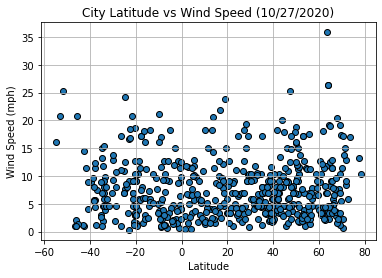

In [34]:
windy = city_df['Wind Speed']

plt.scatter(lat, windy, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (10/27/2020)')
plt.grid()

## Linear Regression

In [39]:
north = city_df.loc[city_df['Lat'] >= 0,:]
south = city_df.loc[city_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8782304226288329


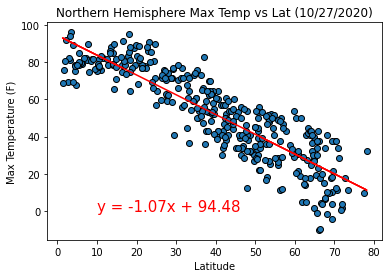

In [41]:
northlat = north['Lat']
northmax = north['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northmax)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northmax, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(10,0), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temp vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7314936320316737


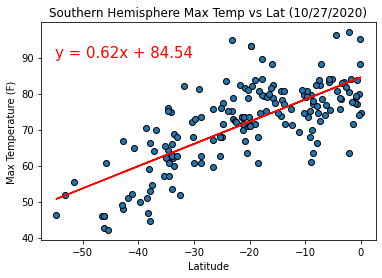

In [44]:
southlat = south['Lat']
southmax = south['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southmax)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southmax, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55, 90), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Max Temp vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3472479621082839


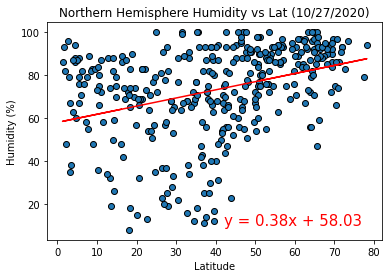

In [47]:
northhum = north['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northhum)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northhum, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(42,10), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.061372850735050444


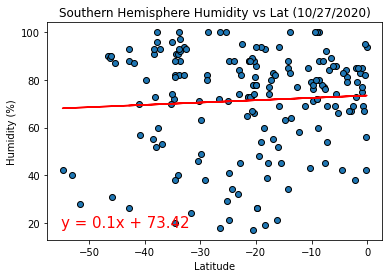

In [49]:
southhum = south['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southhum)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southhum, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55,18), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Humidity vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.11773277219496282


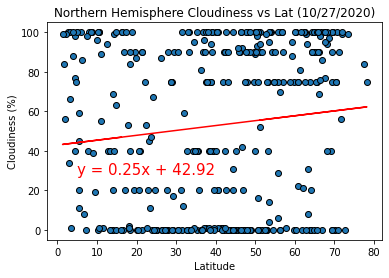

In [61]:
northcloud = north['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northcloud)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northcloud, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(5,28), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Cloudiness vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1645715451755607


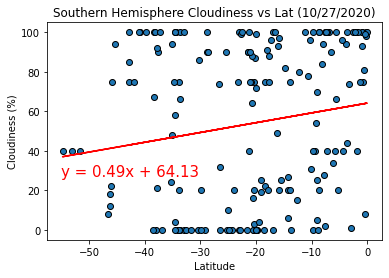

In [54]:
southcloud = south['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southcloud)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southcloud, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-55,27), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Cloudiness vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.11114222622785119


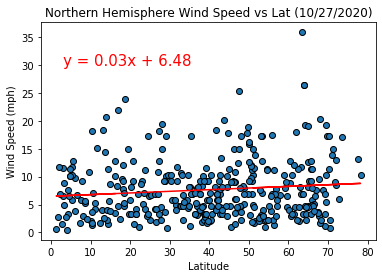

In [56]:
northwind = north['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(northlat, northwind)
regress = northlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northlat, northwind, edgecolors = 'black')
plt.plot(northlat, regress, 'r-')
plt.annotate(line_eq,(3,30), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Wind Speed vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.12590380688022942


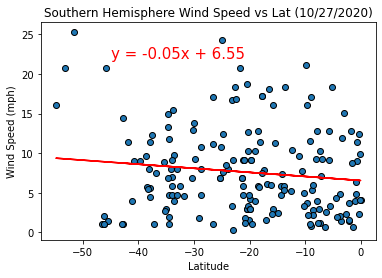

In [59]:
southwind = south['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(southlat, southwind)
regress = southlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southlat, southwind, edgecolors = 'black')
plt.plot(southlat, regress, 'r-')
plt.annotate(line_eq,(-45,22), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Wind Speed vs Lat (10/27/2020)')
print(f'The r-value is {rvalue}')